<a href="https://colab.research.google.com/github/alecgarza96/Customer-Segmentation/blob/main/credit_card_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Preprocessing:**
- Check Data Accuracy
- Handle Missing Values
- Handle Noisy Data
- Normalize Data


In [ ]:
import pandas as pd
import seaborn as sns
import tracemalloc
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

def get_nan_labels(df):
  return df.columns[df.isna().any()].tolist()

def get_cols_no_nan(df):
  return df.columns.difference(cols_nan).values

def impute_regression(df):
  cols_nan = df.columns[df.isna().any()].tolist()
  cols_no_nan = df.columns.difference(cols_nan).values
  for col in cols_nan:
      test_data = df[df[col].isna()]
      train_data = df.dropna()
      rf_reg = RandomForestRegressor().fit(train_data[cols_no_nan], train_data[col])
      df.loc[df[col].isna(), col] = rf_reg.predict(test_data[cols_no_nan])
  return df

def subplot_dist(df, fig_dim):
  cols = df.columns
  cols_length = len(cols)
  #how to automatically pick figsize
  fig, axes = plt.subplots(cols_length, figsize=fig_dim)
  index=0
  for i in range(0,cols_length):
    sns.boxplot(ax=axes[i], data=df, x=cols[index])
    if(index<=cols_length-1):
      index+=1

def elbow_point(num_clusters, data):
  km = [KMeans(n_clusters=i) for i in num_clusters]
  distortions = [km[i].fit(data).inertia_ for i in range(len(km))]
  return distortions

def plot_elbow_point(size, distortions):
  k_size = range(1,size)
  plt.plot(k_size,distortions,'-bx')


def cluster_visual_insights(clusters):
  for c in clusters:
    grid = sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)
  
def scale_data(Model, X):
  return Model.fit_transform(X)

def make_distr_plot(dataset, X, title):
  sns.displot(data=dataset, x=X)
  plt.xticks(rotation=90)
  plt.title(title)
  plt.show()

def kmean(segments, X):
  km = Kmeans(segments)
  return km.fit(X)

def get_score(model, X_train, X_test, y_train, y_test):
  model.fit(X_train,y_train)
  return model.score(X_test, y_test)

def transform_stdscaler(X):
  return StandardScaler().fit_transform(X)

def transform_minmax(X):
  return MinMaxScaler().fit_transform(X)

def transform_pca(X):
  dist = 1-cosine_similarity(X)
  pca=PCA(2)
  pca.fit(dist)
  return pca.transform(X)

def cluster_visual_insights(clusters):
  for c in clusters:
    grid = sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)

def visualize_cluster(groups, title, names, colors):
  fig, ax = plt.subplots(figsize=(18, 8)) 
  
  for name, group in groups:
      ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
              color=colors[name],label=names[name], mec='none')
      ax.set_aspect('auto')
      ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
      ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
  ax.legend()
  ax.set_title(title)
  plt.show()

def group_labels(x,y,labels,col='label'):
  df = pd.DataFrame({'x': x, 'y': y, 'label':labels})
  return df.groupby('label')

cc_data = '/content/CC GENERAL.csv'

cc_df = pd.read_csv(cc_data)

cc_df = cc_df.drop('CUST_ID', axis=1)

print(cc_df.head())

       BALANCE  BALANCE_FREQUENCY  ...  PRC_FULL_PAYMENT  TENURE
0    40.900749           0.818182  ...          0.000000      12
1  3202.467416           0.909091  ...          0.222222      12
2  2495.148862           1.000000  ...          0.000000      12
3  1666.670542           0.636364  ...          0.000000      12
4   817.714335           1.000000  ...          0.000000      12

[5 rows x 17 columns]


# **Checking Data Types**


In [ ]:
print(cc_df.dtypes)

BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object


# **Checking Missing Values**

In [ ]:
cols = cc_df.isna().sum()
print(cols)

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


#**Exploring Data with Missing Values**

In [ ]:
nan_cols = get_nan_labels(cc_df)
print(nan_cols)

['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']


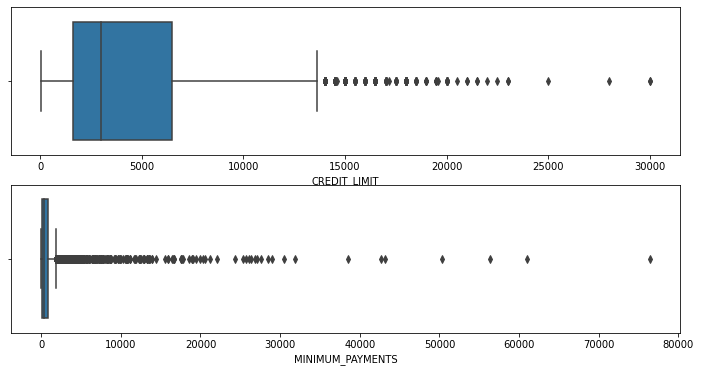

In [ ]:
fig, axes = plt.subplots(len(nan_cols),figsize=(12,6))
sns.boxplot(ax=axes[0], x='CREDIT_LIMIT', data=cc_df)
sns.boxplot(ax=axes[1], x='MINIMUM_PAYMENTS', data=cc_df)

#**Getting Predicted Values for Missing Columns**

In [ ]:
cc_df = impute_regression(cc_df)

#**Visualizing Outliers and Distribution**

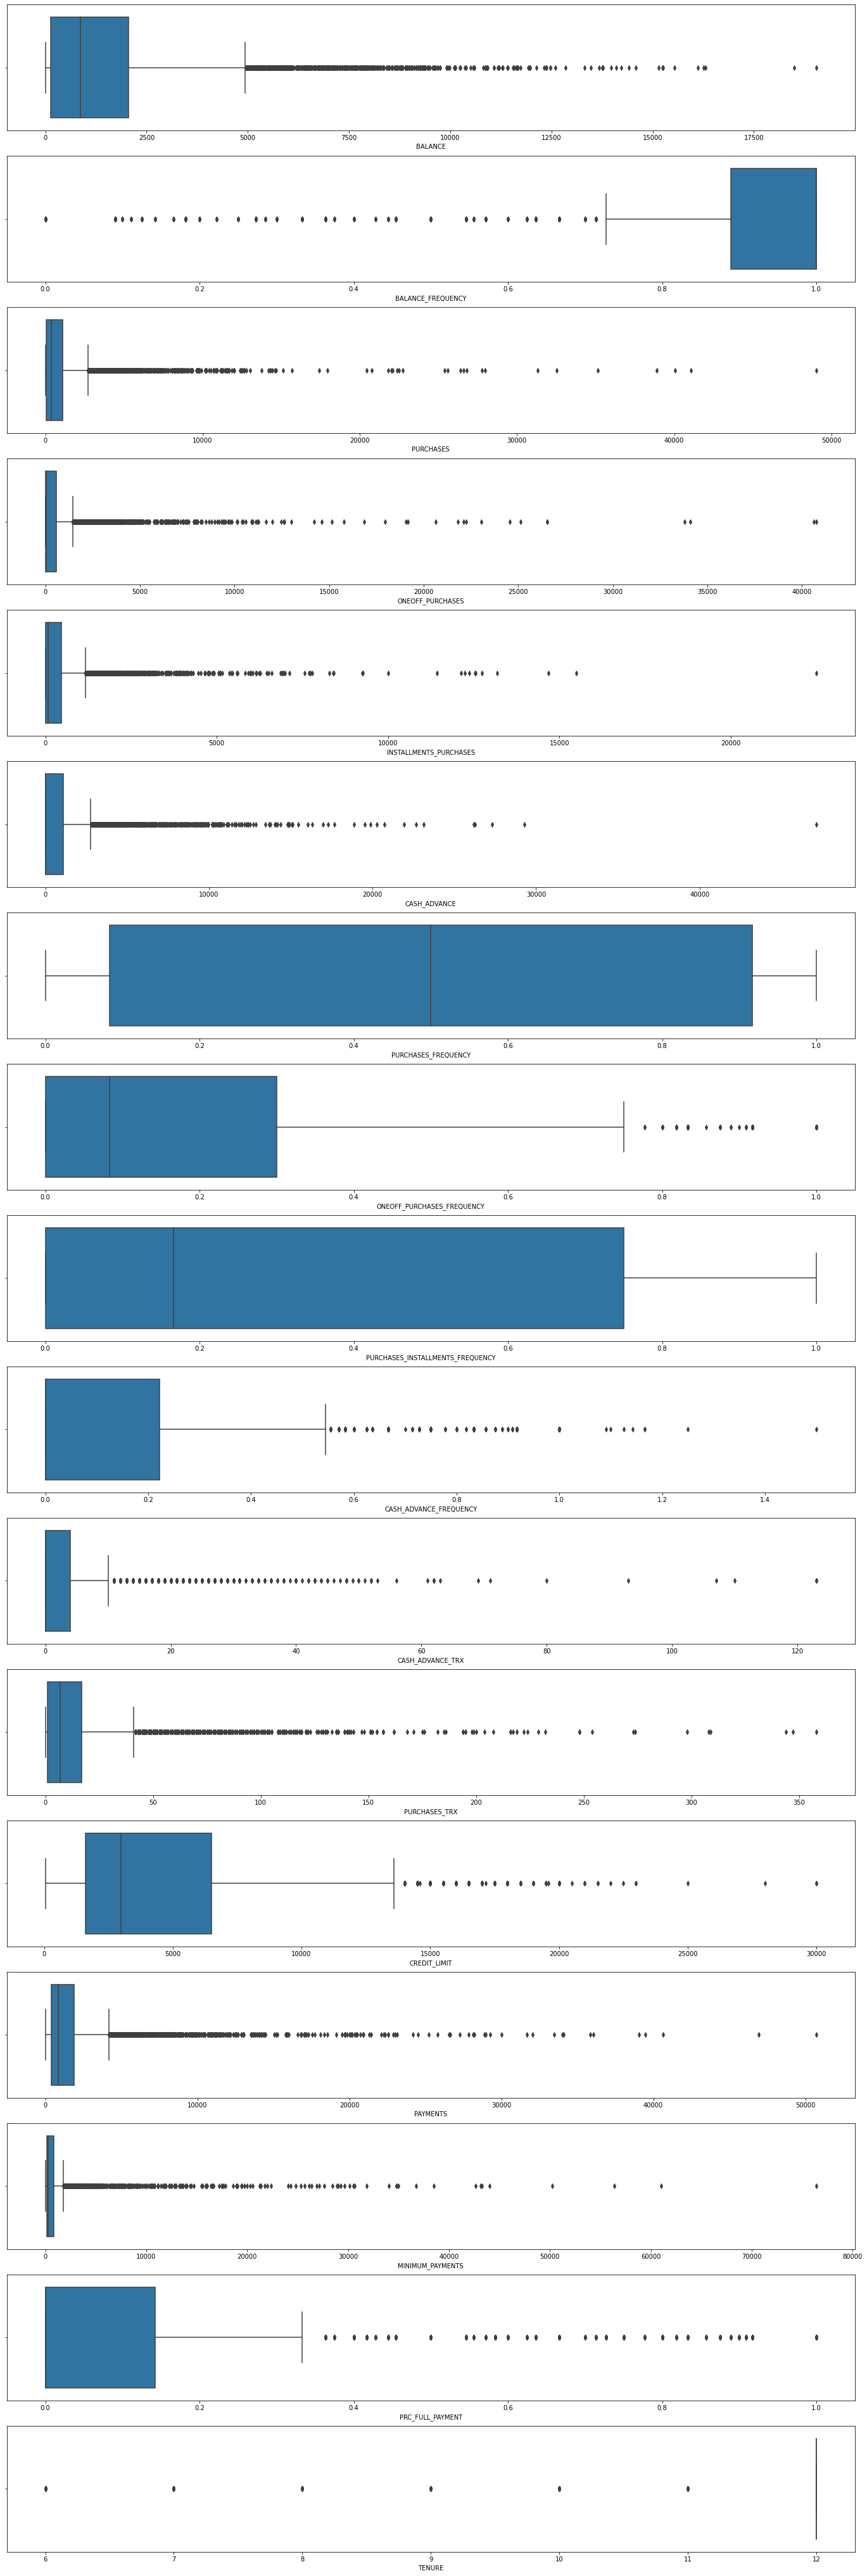

In [ ]:
subplot_dist(cc_df,(24,74))

# **Feature Scaling**

**StandardScaler()**
- removes the mean and scales to unit variance

**Standard score of a sample x is calculated as:**

*z=(x-u)/s*

- u=mean of training samples
- s=standard deviation


In [ ]:
X_stdscaler = scale_data(StandardScaler(), cc_df)
print(X_stdscaler)

[[-0.73198937 -0.24943448 -0.42489974 ... -0.2891115  -0.52555097
   0.36067954]
 [ 0.78696085  0.13432467 -0.46955188 ...  0.04612729  0.2342269
   0.36067954]
 [ 0.44713513  0.51808382 -0.10766823 ... -0.11381587 -0.52555097
   0.36067954]
 ...
 [-0.7403981  -0.18547673 -0.40196519 ... -0.30962891  0.32919999
  -4.12276757]
 [-0.74517423 -0.18547673 -0.46955188 ... -0.31921091  0.32919999
  -4.12276757]
 [-0.57257511 -0.88903307  0.04214581 ... -0.30751914 -0.52555097
  -4.12276757]]


# **MinMaxScaler**

Transforms features by scaling each feature to a given range

*X' = (X-Xmin) / (Xmax-Xmin)*

- values end up ranging between 0 and 1

In [ ]:
from sklearn.preprocessing import MinMaxScaler

X_minmax = scale_data(MinMaxScaler(), cc_df)
print(X_minmax)

[[2.14779454e-03 8.18182000e-01 1.94536779e-03 ... 1.82564563e-03
  0.00000000e+00 1.00000000e+00]
 [1.68169097e-01 9.09091000e-01 0.00000000e+00 ... 1.40344791e-02
  2.22222000e-01 1.00000000e+00]
 [1.31026136e-01 1.00000000e+00 1.57662475e-02 ... 8.20961806e-03
  0.00000000e+00 1.00000000e+00]
 ...
 [1.22871936e-03 8.33333000e-01 2.94456089e-03 ... 1.07843629e-03
  2.50000000e-01 0.00000000e+00]
 [7.06688341e-04 8.33333000e-01 0.00000000e+00 ... 7.29475795e-04
  2.50000000e-01 0.00000000e+00]
 [1.95717777e-02 6.66667000e-01 2.22932216e-02 ... 1.15527021e-03
  0.00000000e+00 0.00000000e+00]]


# **Building Model**

**Selecting Number of Clusters**

Common technique is to run clustering across different values of k. We then determine the error change for different types of k. Increasing K will always decrease error, however, this is not how we want to build our model; eventually, we would have k equal to the number of data points in our dataset.

We can visualize the different error scores from different k's and select the 'elbow point' to be the number of k's we choose. 

The elbow point is where the decrease in k sharply shifts.

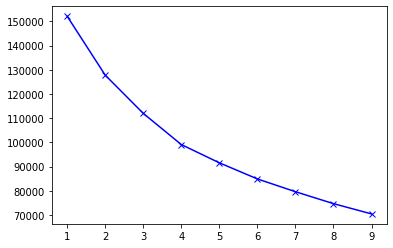

In [ ]:
k_size = range(1,10)
distortions = elbow_point(k_size, X_stdscaler)
plt.plot(k_size, distortions, '-bx')

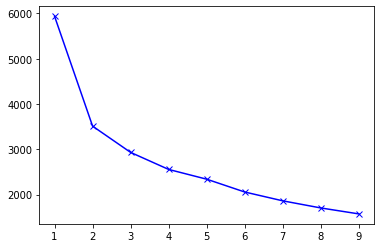

In [ ]:
k_size = range(1,10)
distortions = elbow_point(k_size, X_minmax)
plt.plot(k_size, distortions, '-bx')

In [ ]:
kmean = kmean(4, X_stdscaler)

labels=kmean.labels_
print(labels)

[2 3 1 ... 1 2 2]


# **Principal Component Analysis**

Dimensionality reduction method often used for large datasets. PCA transforms a large variable set into smaller one while retaining original information.
 
There is an inherent trade-off between accuracy and the simplicity that dimension reduction affords.

We will perform PCA for each normalization technique used



In [ ]:
X_PCA = transform_pca(X_stdscaler)
X_PCA.shape

(8950, 2)

# **Cluster Interpretation (Standard Scaler)**

In [ ]:
#test and review for cluster names
clusters_stdscaler = pd.concat([cc_df, pd.DataFrame({'cluster': labels})], axis=1)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,9128.658713,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


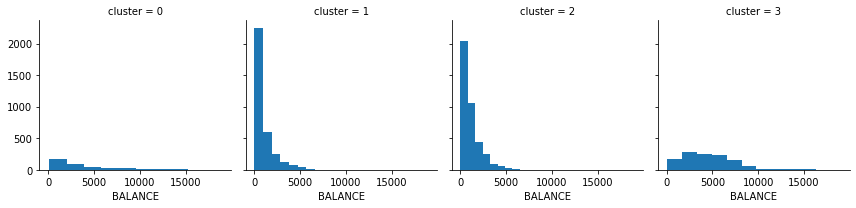

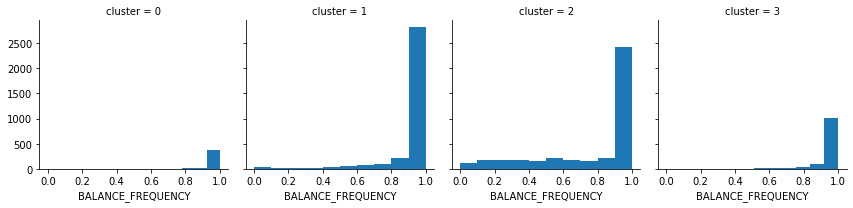

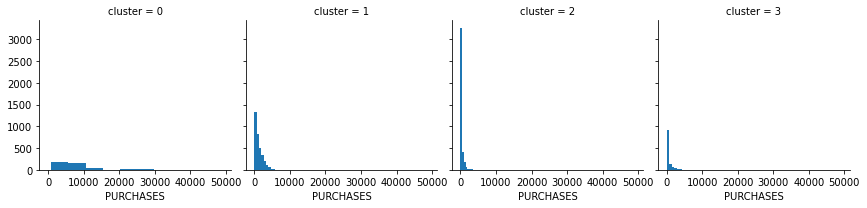

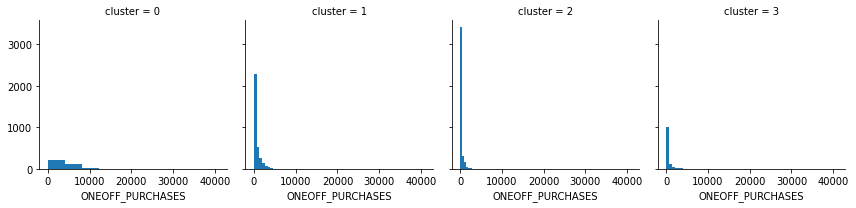

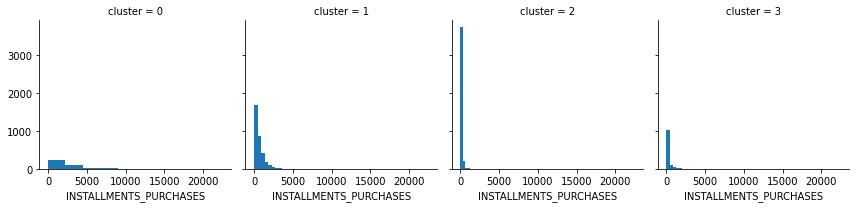

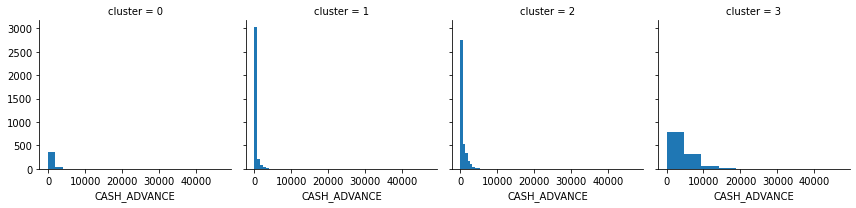

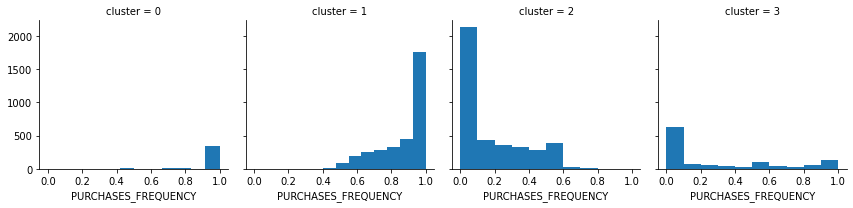

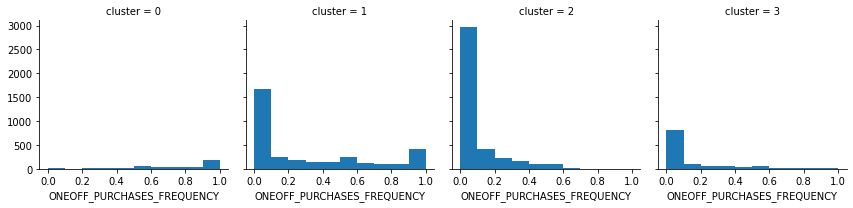

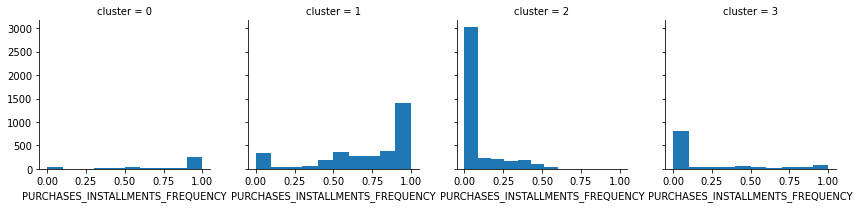

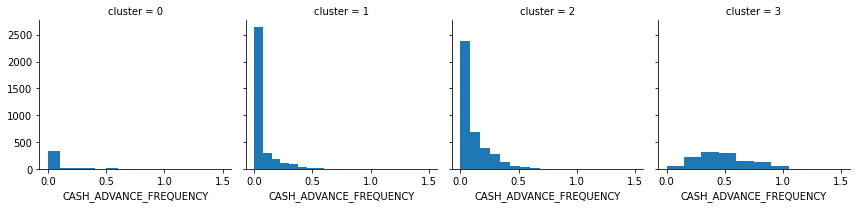

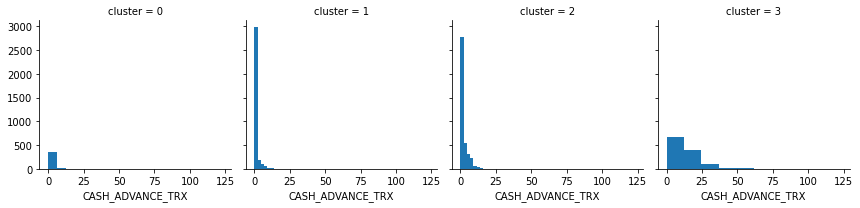

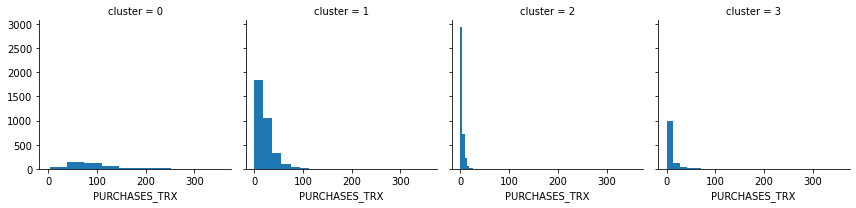

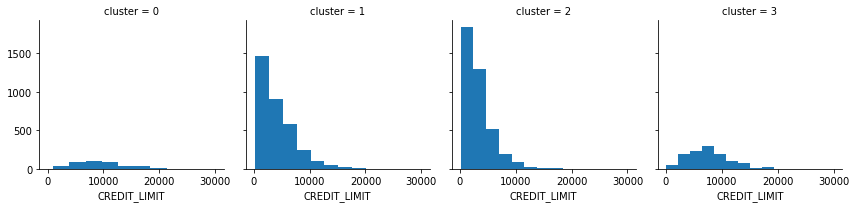

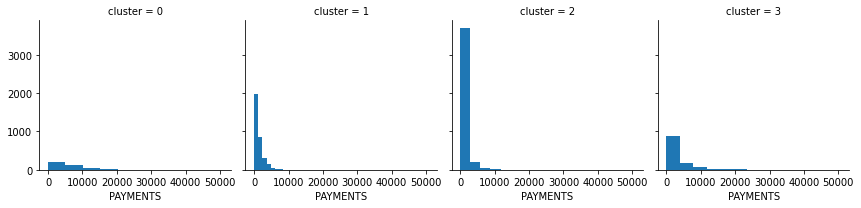

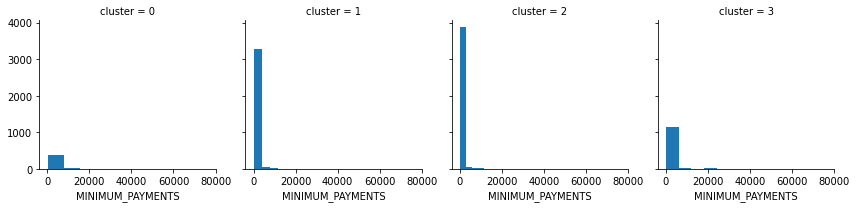

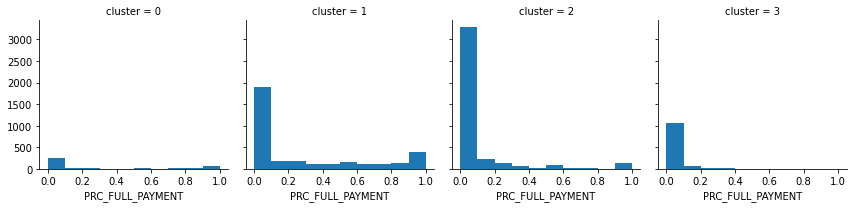

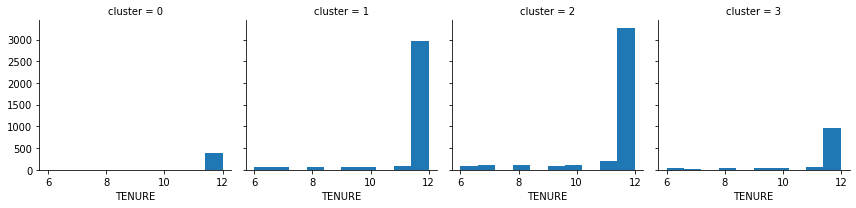

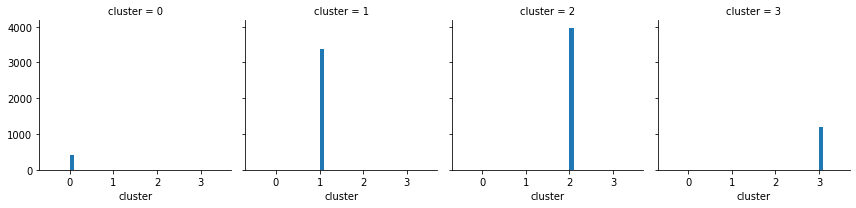

In [ ]:
cluster_visual_insights(clusters_stdscaler)

# **Cluster Visualization (Standard Scaler)**

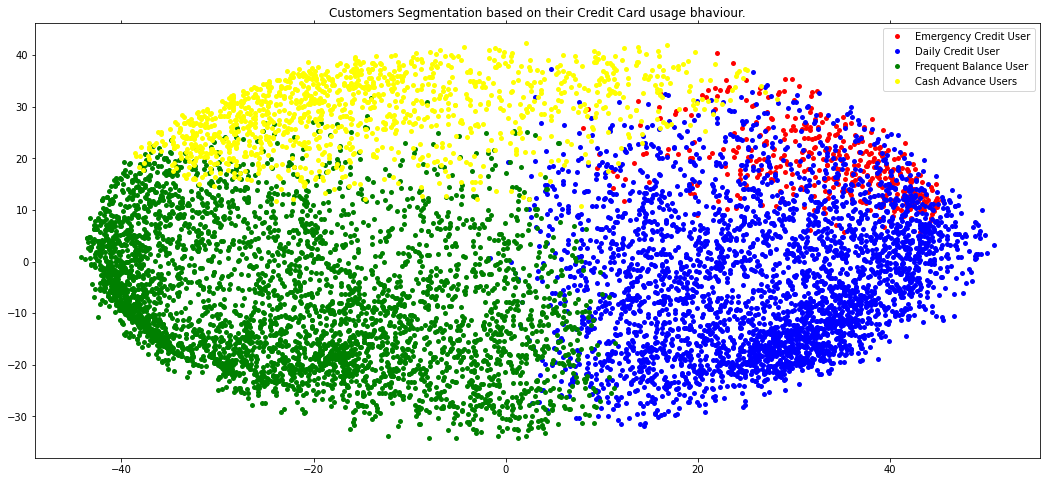

In [ ]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow',}

names = {0: 'Emergency Credit User', 
         1: 'Daily Credit User', 
         2: 'Frequent Balance User', 
         3: 'Cash Advance Users', }

groups = group_labels(x,y,labels)

title = "Customers Segmentation Based on Credit Card Behavior"
visualize_cluster(groups, title, names, colors)


